# PREDICTIVE MAINTAINANCE ANALYSIS

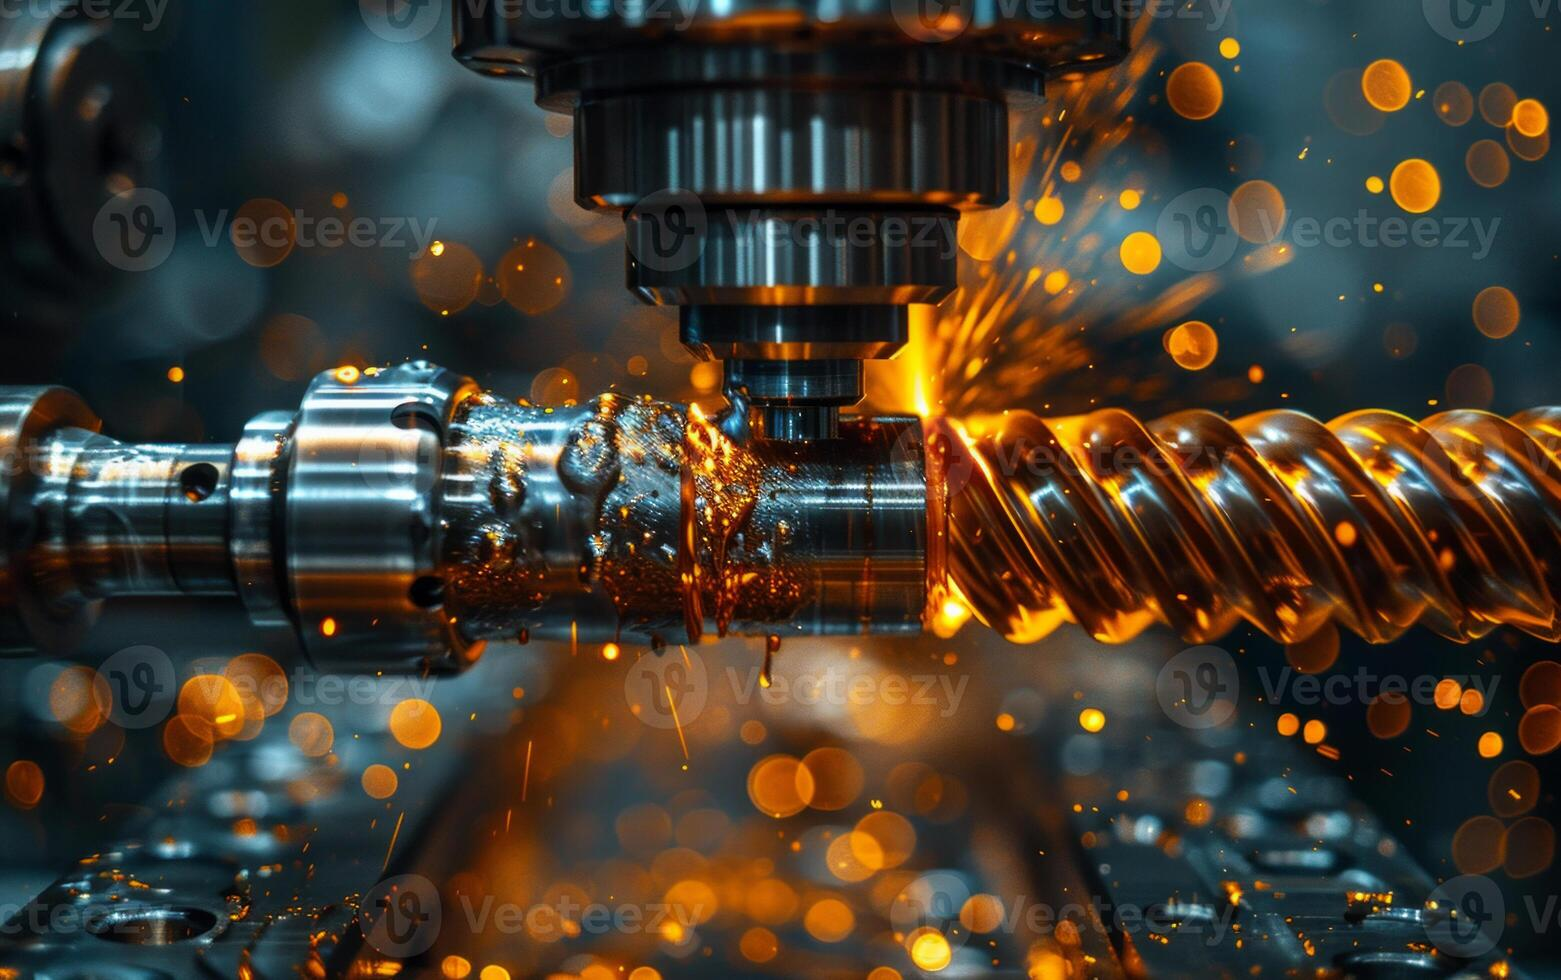

In [2]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/Ml Updated /Predictive Maintainance/IMG2.jpg',width=1100,height=400)

This project is related to a mechanical industry, Sometimes in industries unexpected machine failures occurs due to improper handling, power cutoff, faulty instrument, improper machine parameters given by operator. By analysing and finding insights from the dataset of drilling tool which is used on lathe machine in mechanical industry we created a model using a machine learning algorithm which predict if machine will get failure or not.

## Future scope - 

- By using this model we can improve the productivity of companies.
- We can easily predict  machine will fail or not before start the production by providing input parameters.
- Prevent the machine from failures.
- Improves the safety features from accidents.

In [5]:
# Import Data Manipulation Library
import numpy as np
import pandas as pd
# Import Data Visualisation Library
import matplotlib.pyplot as plt
import seaborn as sns
# Filter warning Library
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Upload the dataset using pandas function
try:
    df = pd.read_csv('/Users/adityaanandraogaikwad/Desktop/Ml Updated /Predictive Maintainance/predictive_maintenance.csv')
    print('Data Loaded Sucessfully')
except:
    print('Error Loading Data')

Data Loaded Sucessfully


In [7]:
# df.sample(frac=1) # It shuffle the data set every time
df.sample(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
5787,5788,L52967,L,301.7,311.3,1584,38.8,132,0,No Failure
1107,1108,M15967,M,296.7,307.5,1515,42.1,55,0,No Failure
4480,4481,H33894,H,302.7,310.4,1305,55.2,20,1,Heat Dissipation Failure
5604,5605,L52784,L,302.9,312.2,1513,37.8,92,0,No Failure
7577,7578,L54757,L,300.4,311.2,1530,32.0,169,0,No Failure


## Data Discription

In [9]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/Ml Updated /Predictive Maintainance/IMG1.jpg',width=1100,height=450)

 - After looking at the dataset, we can assume that the data is about the drilling tool used in a lathe machine.

 - The columns consist values of:
     1. Air temperature in Kelvin (K)
     2. Process temperature in Kelvin (K)
     3. Rotational speed in Rotation per minute (RPM)
     4. Torque in Newton meters (Nm)
     5. Tool wear in minutes (min)
     6. Type
     7. Failure Type
     8. Target
        
    


 - Type column is given to represent the type of product with respect to its quality. 
   L, M and H are for Low, Medium and High quality products respectively.

 - The target column is the output of machine, if it is failing or not.
   0 represents no failure whereas 1 represents that failure has occured.

 - An additional column of Failure Type is given so that we can understand what type of failure is occuring.

In [11]:
# Checking data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


- The data contain no null values and also having categorical columns.

In [13]:
# Split the data into numerical and categorical
numerical_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')

In [14]:
# Univarite Analysis:
from collections import OrderedDict

stats = []

for i in numerical_data.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Mean':numerical_data[i].mean(),
      'Median':numerical_data[i].median(),
      'Min':numerical_data[i].min(),
      'Max':numerical_data[i].max(),
      'Std':numerical_data[i].std(),
      '25%':numerical_data[i].quantile(0.25),
      '75%':numerical_data[i].quantile(0.75),
      'Standard Deviation':numerical_data[i].std(),
      'Skewness':numerical_data[i].skew(),
      'Kurtosis':numerical_data[i].kurt(),

  })
  stats.append(numerical_stats)

report = pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6
Feature,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Mean,5000.5,300.00493,310.00556,1538.7761,39.98691,107.951,0.0339
Median,5000.5,300.1,310.1,1503.0,40.1,108.0,0.0
Min,1.0,295.3,305.7,1168.0,3.8,0.0,0.0
Max,10000.0,304.5,313.8,2886.0,76.6,253.0,1.0
Std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
25%,2500.75,298.3,308.8,1423.0,33.2,53.0,0.0
75%,7500.25,301.5,311.1,1612.0,46.8,162.0,0.0
Standard Deviation,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
Skewness,0.0,0.114274,0.015027,1.993171,-0.009517,0.027292,5.151852


- From the above distribution we can get know the data is normally distributed 
- because the value of mean and median(50%) is close to each other so there is no need to skewness removal.

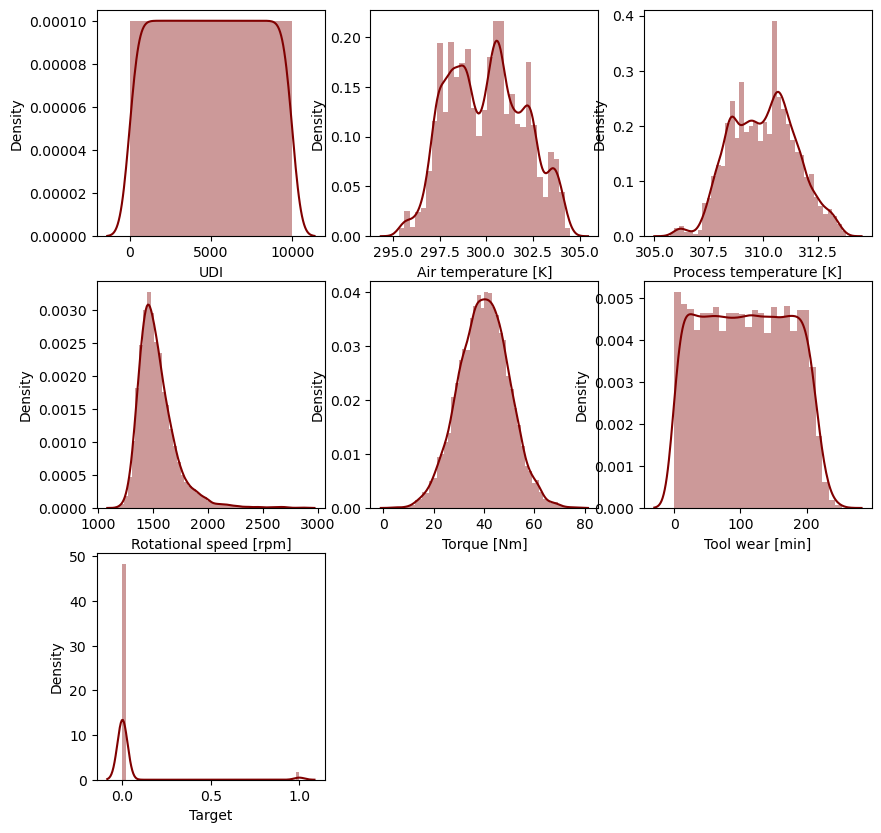

In [16]:
# Now we can see how the data is distributed
plt.figure(figsize=(10,10))
plot = 0
for i in numerical_data:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.distplot(df[i],color='maroon')
plt.tight_layout
plt.show()

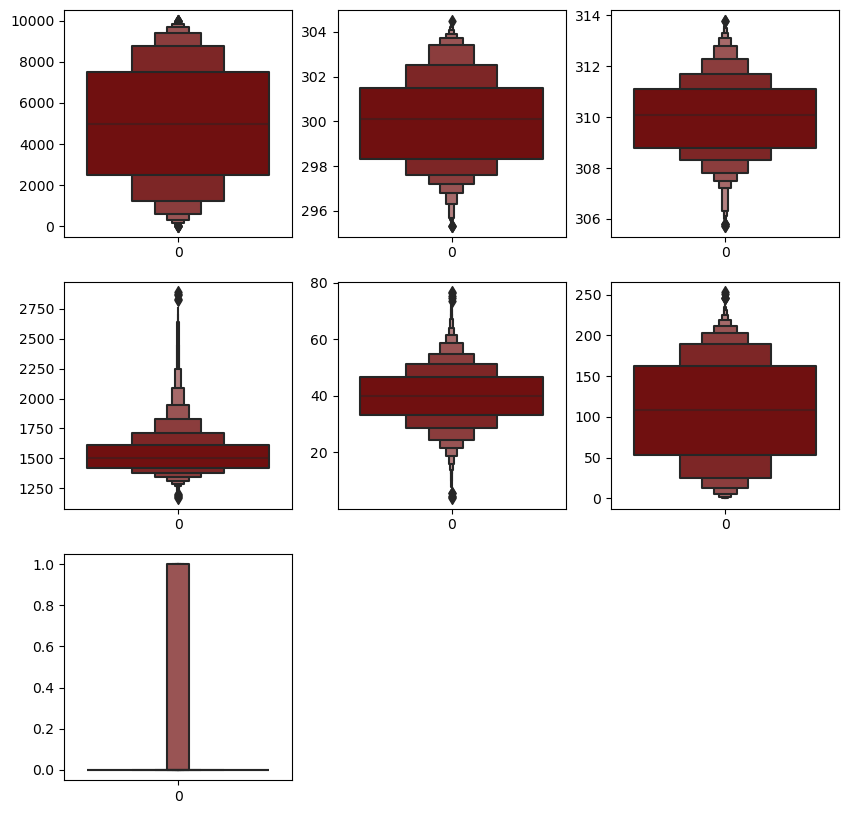

In [17]:
# And also we can see the data has no outliers
plt.figure(figsize=(10,10))
plot = 0
for i in numerical_data:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.boxenplot(df[i],color='maroon')
plt.tight_layout
plt.show()

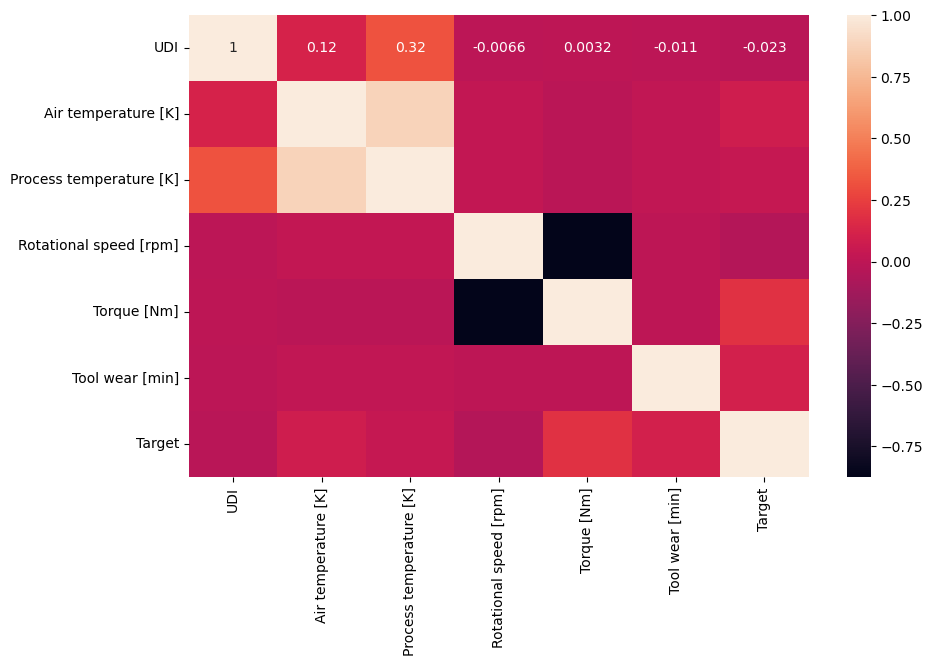

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap((df.select_dtypes([int,float]).corr()),annot=True)
plt.show()

- From above heatmap, we can see that there is no correlation between any two columns.

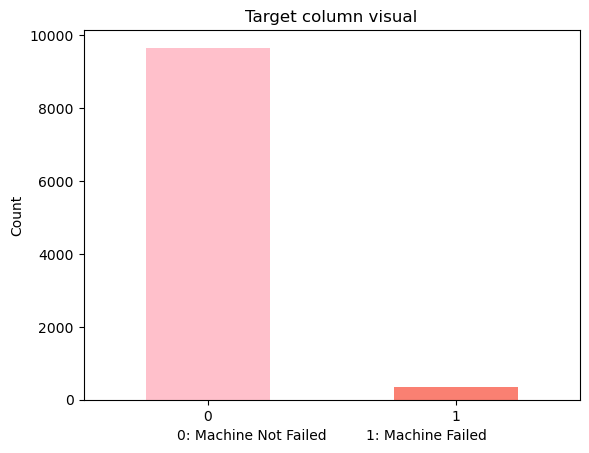

Target
0    9661
1     339
Name: count, dtype: int64

In [20]:
df['Target'].value_counts().plot(kind='bar',color=['Pink','salmon'])
plt.title('Target column visual')
plt.xlabel('0: Machine Not Failed         1: Machine Failed')
plt.ylabel('Count')
plt.xticks(rotation=1)
plt.show()
df['Target'].value_counts() 

- we can see that the the ratio of machine failure is less than as compare to no failure and so there is imbalance in two columns.

In [22]:
numerical_data.columns

Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

In [23]:
categorical_data.columns

Index(['Product ID', 'Type', 'Failure Type'], dtype='object')

In [24]:
# Total Value Count of Failure Type
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

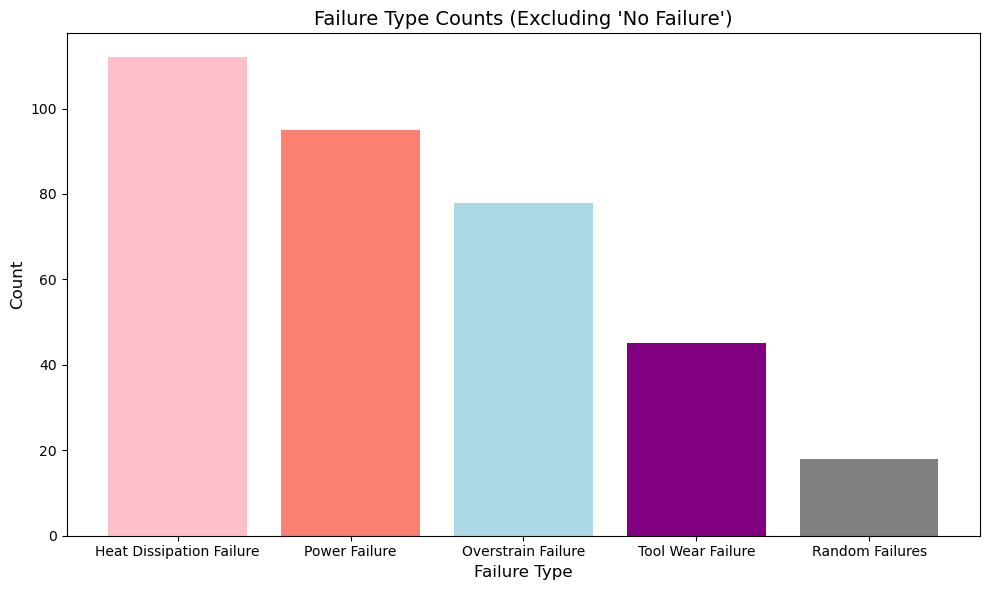

In [25]:
# Creating new dictionary to plot failure type on a bar plot

data = { 'Failed_type': ['Heat Dissipation Failure','Power Failure','Overstrain Failure','Tool Wear Failure','Random Failures'],
         'Counts': [112,95,78,45,18] }
data = pd.DataFrame(data)

plt.figure(figsize=(10,6))
plt.bar(data['Failed_type'],data['Counts'],color=['Pink','salmon','lightblue','purple','gray'])
plt.xlabel("Failure Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Failure Type Counts (Excluding 'No Failure')", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
# Compare Failure type with Target column
crosstab = pd.crosstab(index = categorical_data['Failure Type'],columns=[numerical_data['Target']])
crosstab

Target,0,1
Failure Type,,
Heat Dissipation Failure,0,112
No Failure,9643,9
Overstrain Failure,0,78
Power Failure,0,95
Random Failures,18,0
Tool Wear Failure,0,45


 - Here we can see the types of failures such as:

 - Heat Dissipation Failure : The failure that occurs due to overheating of the tool.
 - Power Failure : The failure occuring due to power cutout.
 - Overstrain Failure : Failure because of excessive strain on the tool.
 - Tool Wear Failure : Failure due to tool wear and tear that happens after excessive use of tool.
 - Random Failures : Random Failures can be any failure whose cause can't be assessed or any human error.

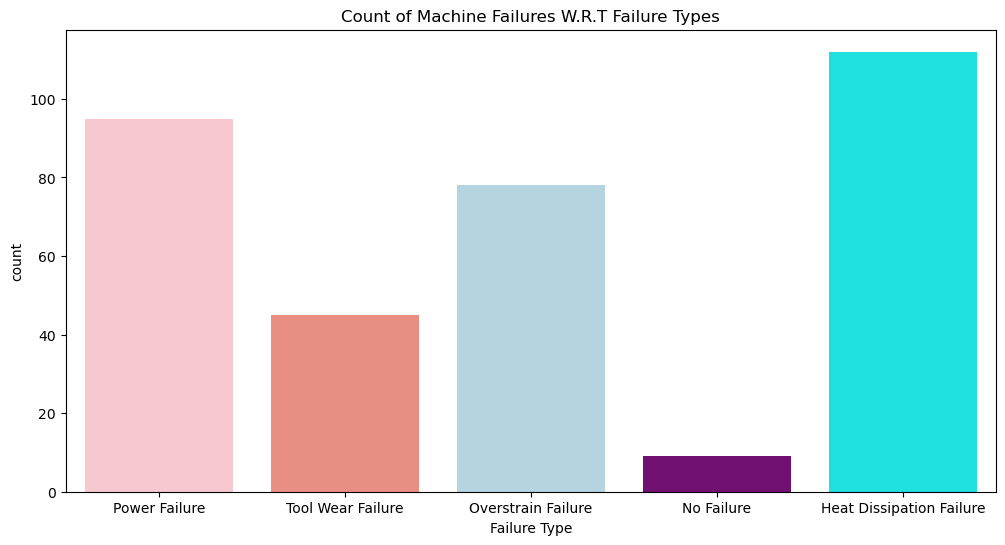

In [28]:
plt.figure(figsize = (12,6))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type",palette=['Pink','salmon','lightblue','purple','cyan'])
plt.title("Count of Machine Failures W.R.T Failure Types")
plt.show()

 - In the above countplot we can see that "No Failure" is also plotted but that does not makes any sense. 
 - This means there are some fake values in the data. 
 - So we need to eliminate them.

In [30]:
df[(df['Target']== 1) & (df['Failure Type']== "No Failure")]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure


In [31]:
i = df[(df['Target']== 1) & (df['Failure Type']== "No Failure")].index
df.drop(i,axis=0,inplace=True) 

In [32]:
# Also, we cannot see anything related to Random Failures since they cannot be assesed. So we will drop the products with Random failures.

In [33]:
i = df[(df['Target']== 0) & (df['Failure Type']== "Random Failures")]
i

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [34]:
i = df[(df['Target']== 0) & (df['Failure Type']== "Random Failures")].index
df.drop(i,axis=0,inplace=True)

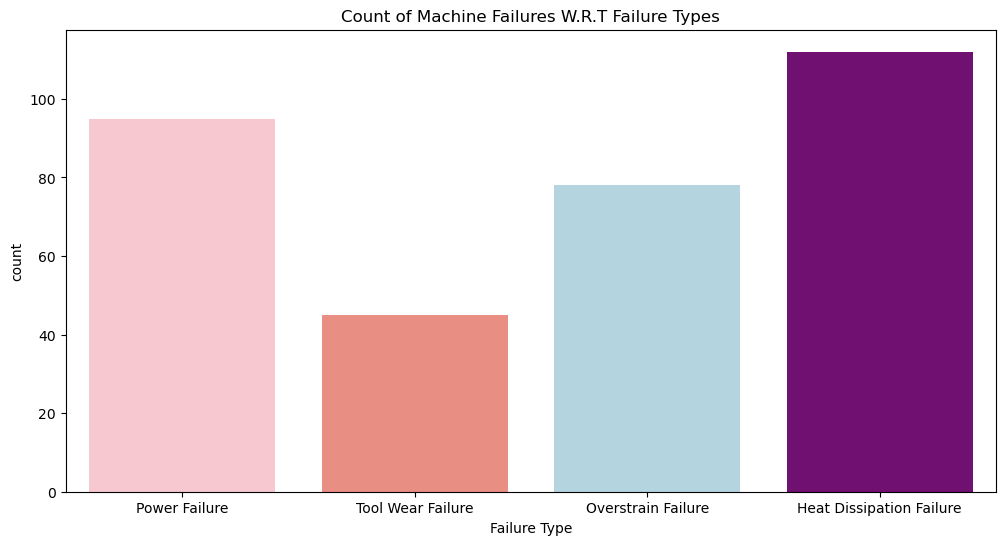

In [35]:
plt.figure(figsize = (12,6))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type",palette=['Pink','salmon','lightblue','purple','gray'])
plt.title("Count of Machine Failures W.R.T Failure Types")
plt.show()

 - From above graph we can see most of time our machine get failed due to Heat Dissipation Failure and after that Power Failure 
 - then Overstrain Failure and last Tool Wear Failure.

In [37]:
crosstab = pd.crosstab(index= categorical_data['Type'],columns=[numerical_data['Target']])
crosstab

Target,0,1
Type,,
H,982,21
L,5765,235
M,2914,83


In [38]:
# Total Count
pd.DataFrame(df['Type'].value_counts())

,count
Type,
L,5984
M,2991
H,998


<Axes: title={'center': 'Percentage of Product Type'}, ylabel='count'>

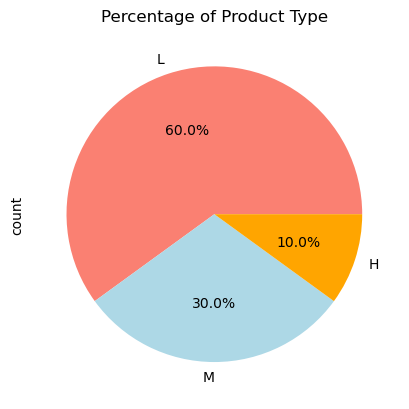

In [39]:
df['Type'].value_counts().plot(kind='pie',autopct='%.1f%%',title="Percentage of Product Type",colors=['salmon','lightblue','orange'])

- From our total products 60% are low quality products and 30% are medium quality products then 10% are high quality products.

In [41]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [42]:
# Droping the unnecessary columns that we dont require 
df.drop(['UDI','Product ID','Failure Type'],axis=1,inplace=True)

In [43]:
# To see the correlation of columns with target column we plotting a line plot

In [44]:
features = df.drop(columns=['Target'],axis=1)
features.sample(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
2093,L,299.4,309.2,1564,39.0,26
3010,L,300.3,309.6,1537,37.1,187


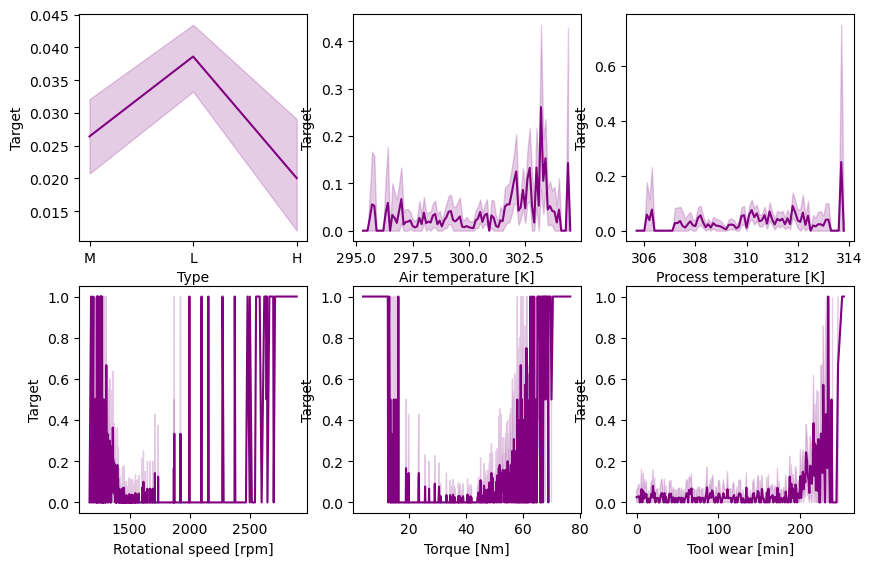

In [45]:
plt.figure(figsize=(10,10))
plot = 0
for i in features:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.lineplot(x=features[i],y=df['Target'],color='purple')
plt.show()

- Here we can see that Rotational speed [rpm], Torque [Nm], Tool wear [min] are highly affecting our Target column

In [47]:
df.sample(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
6435,L,300.3,309.9,1621,34.1,36,0
1466,L,298.7,309.8,1365,50.5,111,0


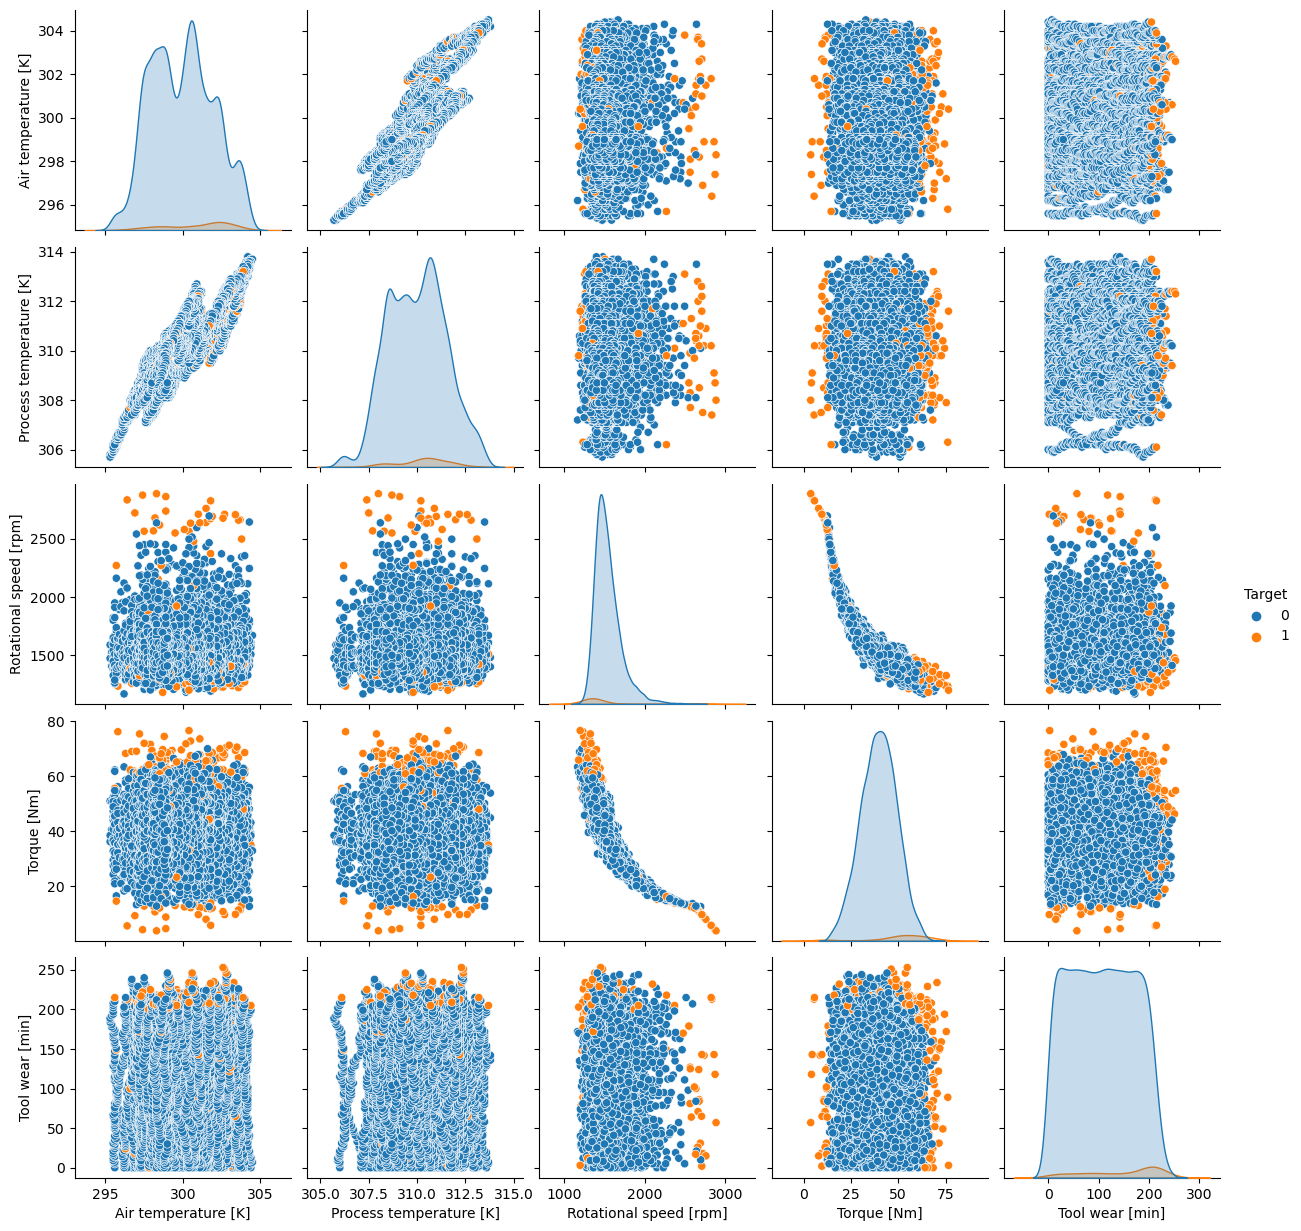

In [48]:
sns.pairplot(df,hue='Target')

In [49]:
# Handle categorical column
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [50]:
# Replacing the categories with integers
df['Type'] = df['Type'].replace("L",0)
df['Type'] = df['Type'].replace("M",1)
df['Type'] = df['Type'].replace("H",2)

In [51]:
df.sample(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
3320,0,301.5,310.5,2289,16.4,112,0
1894,2,297.9,307.5,1880,23.3,146,0
4159,1,302.0,310.5,1639,32.9,94,0
9009,0,297.3,307.9,1579,34.4,193,0
665,0,297.5,308.9,1729,28.1,189,0


## Splitting the Data into Features and Target

In [53]:
X = df.drop(columns='Target')
y = df['Target']

## Splitting the Data into Train Test Split

In [55]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Xtrain = scalar.fit_transform(Xtrain)
Xtest = scalar.fit_transform(Xtest)

In [59]:
Xtrain.min(),Xtest.max()

(-3.599280469116299, 7.330693487260101)

In [61]:
ytrain.min(),ytrain.max()

(0, 1)

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
Xtrain,ytrain = smote.fit_resample(Xtrain,ytrain)

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error,mean_absolute_error

In [67]:
def mymodel(model):
    model.fit(Xtrain,ytrain)
    ypred = model.predict(Xtest)
    print(classification_report(ytest,ypred))
    print('Mean Absolute Error: ',mean_absolute_error(ytest,ypred))
    print('Mean Squared Error: ',mean_squared_error(ytest,ypred))
    return model   

- Here we created a function to check which Machine Learning Algorithm will be the best fit for our model. 
- We will select the one with highest accuracy.

### LogisticRegression()

In [69]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2903
           1       0.13      0.87      0.22        89

    accuracy                           0.82      2992
   macro avg       0.56      0.84      0.56      2992
weighted avg       0.97      0.82      0.88      2992

Mean Absolute Error:  0.17747326203208555
Mean Squared Error:  0.17747326203208555


LogisticRegression()

### KNeighborsClassifier

In [72]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      2903
           1       0.30      0.82      0.44        89

    accuracy                           0.94      2992
   macro avg       0.65      0.88      0.71      2992
weighted avg       0.97      0.94      0.95      2992

Mean Absolute Error:  0.061163101604278076
Mean Squared Error:  0.061163101604278076


KNeighborsClassifier()

### DecisionTreeClassifier

In [75]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2903
           1       0.31      0.71      0.43        89

    accuracy                           0.94      2992
   macro avg       0.65      0.83      0.70      2992
weighted avg       0.97      0.94      0.96      2992

Mean Absolute Error:  0.05514705882352941
Mean Squared Error:  0.05514705882352941


DecisionTreeClassifier()

## Random Forest Testing

In [78]:
mymodel(rfc)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2903
           1       0.43      0.80      0.56        89

    accuracy                           0.96      2992
   macro avg       0.71      0.88      0.77      2992
weighted avg       0.98      0.96      0.97      2992

Mean Absolute Error:  0.037098930481283425
Mean Squared Error:  0.037098930481283425


RandomForestClassifier()

- Random Forest have the maximum accuracy so it is the best suit algorithm for our model

In [81]:
print(rfc.score(Xtrain,ytrain))
print(rfc.score(Xtest,ytest))

1.0
0.9629010695187166


- Here we have different training and testing score 

## Hyperparameter Tunning

In [85]:
for i in range(2,51):
    rfc1 = RandomForestClassifier(max_depth=i)
    rfc1.fit(Xtrain,ytrain)
    ypred = rfc1.predict(Xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

2 = 0.8626336898395722
3 = 0.8609625668449198
4 = 0.8826871657754011
5 = 0.8990641711229946
6 = 0.9154411764705882
7 = 0.9241310160427807
8 = 0.9301470588235294
9 = 0.9324866310160428
10 = 0.9411764705882353
11 = 0.9431818181818182
12 = 0.9508689839572193
13 = 0.953542780748663
14 = 0.9552139037433155
15 = 0.9582219251336899
16 = 0.9585561497326203
17 = 0.9608957219251337
18 = 0.9602272727272727
19 = 0.9615641711229946
20 = 0.9595588235294118
21 = 0.9598930481283422
22 = 0.9612299465240641
23 = 0.9625668449197861
24 = 0.9595588235294118
25 = 0.9615641711229946
26 = 0.9635695187165776
27 = 0.9592245989304813
28 = 0.9612299465240641
29 = 0.9615641711229946
30 = 0.9612299465240641
31 = 0.9608957219251337
32 = 0.9618983957219251
33 = 0.9625668449197861
34 = 0.9618983957219251
35 = 0.9629010695187166
36 = 0.9605614973262032
37 = 0.9612299465240641
38 = 0.9632352941176471
39 = 0.9625668449197861
40 = 0.9605614973262032
41 = 0.9632352941176471
42 = 0.9635695187165776
43 = 0.9622326203208557
4

In [86]:
# 12
for i in range(2,51):
    rfc2 = RandomForestClassifier(min_samples_split=i)
    rfc2.fit(Xtrain,ytrain)
    ypred = rfc2.predict(Xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

2 = 0.9598930481283422
3 = 0.9622326203208557
4 = 0.9605614973262032
5 = 0.9612299465240641
6 = 0.9605614973262032
7 = 0.9578877005347594
8 = 0.9602272727272727
9 = 0.9602272727272727
10 = 0.9582219251336899
11 = 0.9588903743315508
12 = 0.9575534759358288
13 = 0.955548128342246
14 = 0.955548128342246
15 = 0.9552139037433155
16 = 0.9558823529411765
17 = 0.9578877005347594
18 = 0.9558823529411765
19 = 0.9572192513368984
20 = 0.9542112299465241
21 = 0.9498663101604278
22 = 0.9522058823529411
23 = 0.9502005347593583
24 = 0.9522058823529411
25 = 0.9518716577540107
26 = 0.9512032085561497
27 = 0.9525401069518716
28 = 0.9485294117647058
29 = 0.9485294117647058
30 = 0.9495320855614974
31 = 0.946524064171123
32 = 0.9481951871657754
33 = 0.9485294117647058
34 = 0.9491978609625669
35 = 0.9471925133689839
36 = 0.945855614973262
37 = 0.945855614973262
38 = 0.9461898395721925
39 = 0.9451871657754011
40 = 0.9388368983957219
41 = 0.9448529411764706
42 = 0.9391711229946524
43 = 0.9448529411764706
44 = 

In [87]:
# 3
for i in range(1,51):
    rfc3 = RandomForestClassifier(min_samples_leaf=i)
    rfc3.fit(Xtrain,ytrain)
    ypred = rfc3.predict(Xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

1 = 0.9592245989304813
2 = 0.9588903743315508
3 = 0.955548128342246
4 = 0.9538770053475936
5 = 0.9528743315508021
6 = 0.9488636363636364
7 = 0.9448529411764706
8 = 0.94451871657754
9 = 0.9415106951871658
10 = 0.9411764705882353
11 = 0.9364973262032086
12 = 0.9354946524064172
13 = 0.9311497326203209
14 = 0.9301470588235294
15 = 0.9314839572192514
16 = 0.9314839572192514
17 = 0.9294786096256684
18 = 0.9278074866310161
19 = 0.9281417112299465
20 = 0.9288101604278075
21 = 0.9251336898395722
22 = 0.9258021390374331
23 = 0.9237967914438503
24 = 0.9247994652406417
25 = 0.9241310160427807
26 = 0.9231283422459893
27 = 0.9237967914438503
28 = 0.9224598930481284
29 = 0.9211229946524064
30 = 0.9227941176470589
31 = 0.9224598930481284
32 = 0.9187834224598931
33 = 0.9221256684491979
34 = 0.9157754010695187
35 = 0.9134358288770054
36 = 0.9144385026737968
37 = 0.9124331550802139
38 = 0.9114304812834224
39 = 0.9137700534759359
40 = 0.9124331550802139
41 = 0.9120989304812834
42 = 0.9100935828877005
43 =

In [88]:
Final_model = RandomForestClassifier(max_depth=16,min_samples_leaf=2,min_samples_split=16)
mymodel(Final_model)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2903
           1       0.37      0.87      0.52        89

    accuracy                           0.95      2992
   macro avg       0.68      0.91      0.75      2992
weighted avg       0.98      0.95      0.96      2992

Mean Absolute Error:  0.04712566844919786
Mean Squared Error:  0.04712566844919786


RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=16)

In [89]:
print(Final_model.score(Xtrain,ytrain))
print(Final_model.score(Xtest,ytest))

0.9920623145400593
0.9528743315508021


- Now we are get equal training and testing score

In [91]:
X.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [92]:
# Creating a function to test the model
def modeltest():
    Type = int(input("Enter type of product based on quality.\nIf Low, enter 0.\nIf Medium, enter 1.\nIf High, enter 2.\nYou entered : "))
    Air_temp = eval(input("Enter Air Temperature in K : "))
    Process_temp = eval(input("Enter Process Temperature in K : "))
    Rotational_speed = int(input("Enter Rotational Speed in RPM : "))
    Torque = eval(input("Enter Torque in Nm : "))
    Tool_wear = int(input("Enter Tool Wear in min : "))
    Temp_difference = Process_temp-Air_temp

    newx = [Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear]
    yp = Final_model.predict([newx])[0]

    if yp == 1:
        print("Output: Machine is Failed")
        return yp
    else:
        print("Output: Machine is not Failed")
        return yp    

- In order to check if our model is working properly or not, we need to test it.
- Here we have some existing values of the given parameters for testing failure.

## Model testing

### Testing if our model is properly working or not.

Example:-

- Type = M
- Air temperature [K] = 298.2
- Process temperature [K] = 308.5
- Rotational speed [rpm] = 2678
- Torque [Nm] = 10.7
- Tool wear [min] = 86
- Target = 1

## Here the machine should fail.

In [98]:
# modeltest()

Example:-

- Type = H
- Air temperature [K] = 298.4
- Process temperature [K] = 308.9
- Rotational speed [rpm] = 1782
- Torque [Nm] = 23.9
- Tool wear [min] = 24
- Target = 0

### Here the machine should not fail.

In [101]:
# modeltest()

Since the outcome is correct our model is successful

# Prescriptive Analysis

After studying the dataset, we can see that machine failure is mainly occuring because of 3 reasons:
- Improper rotational speed of the spindle.
- Torque not maintained as perf the requirement.
- High tool wear.

- Air temperature and Process temperature are not playing any major role in machine failure.
- Low quality products are more likely to fail compared to medium quality and high quality products.
- Heat dissipation failure is the most occuring failure which causes due to overheating of the tool.
- Power failure is also a major problem causing machine failure.

- Measures to take in order to avoid failure.

   1. User must set the rotational speed properly. Not too high and also not too low.
   2. User should not set the torque too high or too low. Torque should be set as per the tool requirement.
   3. User should not use the same tool for long period of time. Since tools may wear due to excessive usage.
   4. High quality and medium quality products should be used more frequently.
   5. Overheating of tool must be avoided by constantly providing coolant to the tool. 
   6. Secondary power input shoould be provided in case of power failure

## ANN Technique Testing

In [108]:
# Using ANN Technique
import tensorflow
from keras.models import Sequential
from keras.layers import Dense   

In [109]:
ann_model = Sequential()

ann_model.add(Dense(128,activation= 'relu',input_dim = 6))
ann_model.add(Dense(64,activation= 'relu'))
ann_model.add(Dense(32,activation= 'relu'))
ann_model.add(Dense(16,activation= 'relu'))
ann_model.add(Dense(1,activation= 'sigmoid'))

In [110]:
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann_model.fit(Xtrain,ytrain,epochs=1000,batch_size=32,validation_split=0.3)

Epoch 1/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.8366 - loss: 0.3977 - val_accuracy: 0.8900 - val_loss: 0.2599
Epoch 2/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9350 - loss: 0.1640 - val_accuracy: 0.9726 - val_loss: 0.0899
Epoch 3/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9489 - loss: 0.1310 - val_accuracy: 0.9073 - val_loss: 0.2034
Epoch 4/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9568 - loss: 0.1011 - val_accuracy: 0.9785 - val_loss: 0.0834
Epoch 5/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.9611 - loss: 0.0926 - val_accuracy: 0.8019 - val_loss: 0.4195
Epoch 6/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9620 - loss: 0.0894 - val_accuracy: 0.9926 - val_loss: 0.0539
Epoch 7/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9645 - loss: 0.0822 - val_accuracy: 0.9491 - val_loss: 0.1451
Epoch 8/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9725 -

In [ ]:
model_history = ann_model.history.history

plt.figure(figsize = (20,5))
plt.plot(model_history['accuracy'])
plt.plot(model_history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'],loc = 'upper left')
plt.show()

In [ ]:
y_pred_ann = ann_model.predict(Xtest)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0)
print('Classification Report :',classification_report(ytest,y_pred_ann))
print('Accuracy Score :',accuracy_score(ytest,y_pred_ann))

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds = roc_curve(ytest,y_pred_ann)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Thank You ..